In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [16]:
spamdata = pd.read_csv(r"C:\Users\jaiad.APPAUMMI\Desktop\SPAM SMS DETECTION\spam.csv", encoding = 'latin1', engine='python', usecols=['v1','v2'])

In [17]:
spamdata

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
spamdata.columns = ['Detected Type', 'Message']

In [19]:
spamdata

,Detected Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
spamdata.head() #gives the top 5 data

,Detected Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
spamdata.tail() #gives the last 5 data

,Detected Type,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [22]:
spamdata.info() #gives the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Detected Type  5572 non-null   object
 1   Message        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
spamdata.isnull()

,Detected Type,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [24]:
spamdata.isnull().any() #checks for null values

Detected Type    False
Message          False
dtype: bool

In [26]:
spamdata.duplicated().any() #has duplicate values in the data

True

In [30]:
spamdata.drop_duplicates(inplace = True) #removed duplicate values in the data

In [33]:
spamdata.duplicated().any() #no duplicates in the data

False

C:\Users\jaiad.APPAUMMI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


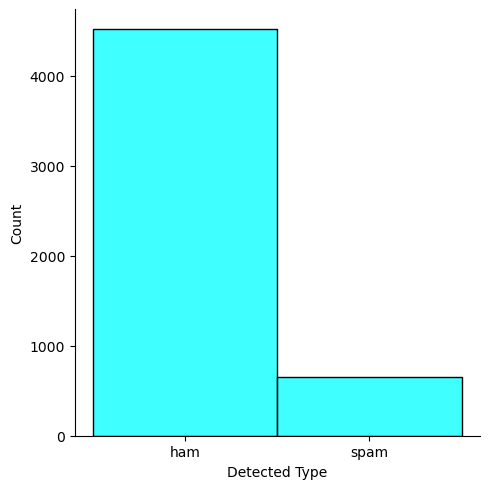

In [39]:
sns.displot(spamdata['Detected Type'], color = "Cyan")

In [42]:
Encoder = LabelEncoder()

In [46]:
spamdata["Detected Type"] =Encoder.fit_transform(spamdata["Detected Type"].values)

In [47]:
spamdata

,Detected Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [48]:
Vectorizer = TfidfVectorizer()

In [50]:
X = Vectorizer.fit_transform(spamdata['Message'])

In [51]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
Y = spamdata['Detected Type']

In [53]:
X.shape

(5169, 8672)

In [54]:
Y.shape

(5169,)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 32)

In [78]:
Naive_Bayes = MultinomialNB()

In [80]:
Naive_Bayes.fit(X_train, Y_train)

MultinomialNB()

In [81]:
Bayes_Predictions = Naive_Bayes.predict(X_test)

In [91]:
print(confusion_matrix(Y_test, Bayes_Predictions))
print(classification_report(Y_test, Bayes_Predictions))
print("Accuracy Score:", accuracy_score(Y_test, Bayes_Predictions))
print("r2 Score:", r2_score(Y_test, Bayes_Predictions))
print("Recall Score:", accuracy_score(Y_test, Bayes_Predictions))

[[921   0]
 [ 31  82]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       921
           1       1.00      0.73      0.84       113

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy Score: 0.9700193423597679
r2 Score: 0.6920046505818032
Recall Score: 0.9700193423597679


In [97]:
svm_model = SVC(kernel ="linear")

In [98]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [101]:
svc_predictions = svm_model.predict(X_test)

In [103]:
print(confusion_matrix(Y_test, svc_predictions))
print(classification_report(Y_test, svc_predictions))
print("Accuracy Score:", accuracy_score(Y_test, svc_predictions))
print("r2 Score:", r2_score(Y_test, svc_predictions))
print("Recall Score:", accuracy_score(Y_test, svc_predictions))

[[918   3]
 [ 14  99]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       921
           1       0.97      0.88      0.92       113

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy Score: 0.9835589941972921
r2 Score: 0.8310993245126017
Recall Score: 0.9835589941972921


In [104]:
lr_classification = LogisticRegression()

In [105]:
lr_classification.fit(X_train, Y_train)

LogisticRegression()

In [106]:
lr_predictions = lr_classification.predict(X_test)

In [107]:
print(confusion_matrix(Y_test, lr_predictions))
print(classification_report(Y_test, lr_predictions))
print("Accuracy Score:", accuracy_score(Y_test, lr_predictions))
print("r2 Score:", r2_score(Y_test, lr_predictions))
print("Recall Score:", accuracy_score(Y_test, lr_predictions))

[[918   3]
 [ 39  74]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       921
           1       0.96      0.65      0.78       113

    accuracy                           0.96      1034
   macro avg       0.96      0.83      0.88      1034
weighted avg       0.96      0.96      0.96      1034

Accuracy Score: 0.9593810444874274
r2 Score: 0.5827159782076042
Recall Score: 0.9593810444874274
